In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

## Pure with both particles on boundary together

In [2]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

CPU times: user 14min 25s, sys: 13.1 s, total: 14min 38s
Wall time: 42.3 s


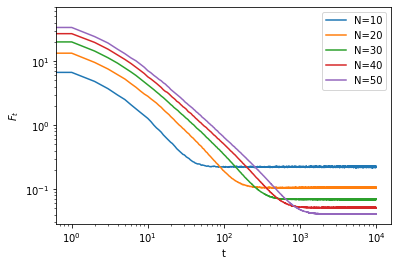

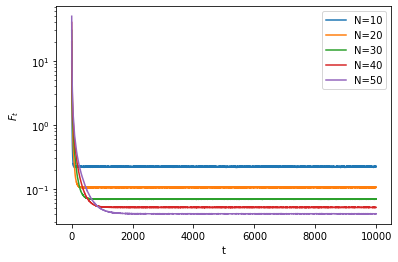

In [3]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure with both particles on boundary at opposite ends

In [4]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

CPU times: user 14min 24s, sys: 13.3 s, total: 14min 38s
Wall time: 42.2 s


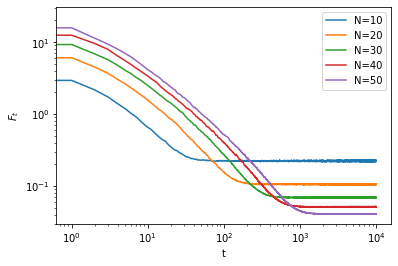

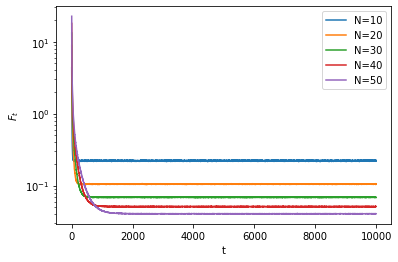

In [5]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure uniformly delocalized pair

In [6]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(len(input_states))
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

CPU times: user 14min 23s, sys: 13.2 s, total: 14min 36s
Wall time: 42.1 s


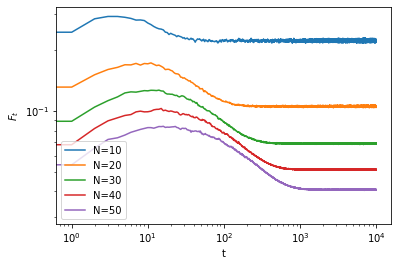

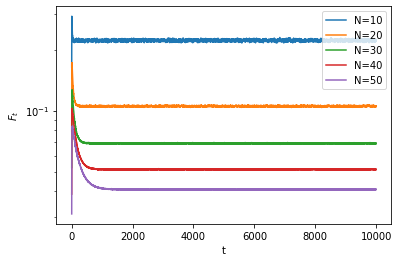

In [7]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Mixed with delocalized pair

In [12]:
%%time

k = 10000
ne = 100
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    input_states = numpy.asarray(input_states, dtype=numpy.uint64)
    input_states = numpy.expand_dims(input_states, axis=1)
    probs = numpy.ones((n,)) / n
    amplitudes = numpy.ones((n, len(input_states)), dtype=numpy.complex128)
    
    s = py_entropy.MultiDefectState.new_mixed(input_states, probs, amplitudes, n, 2, 
                                              num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

CPU times: user 2h 20min 14s, sys: 3min 36s, total: 2h 23min 51s
Wall time: 6min 56s


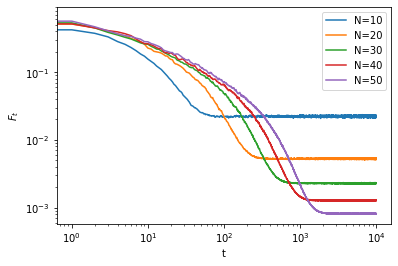

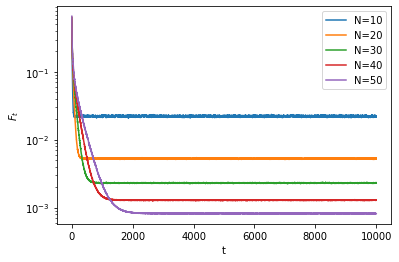

In [13]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()